## Practice CNN
without training process

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/miokobayashii/summerschool2022/blob/main/day02/Practice05_practiceCNN.ipynb)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.datasets import mnist

from keras.layers import Dense, Flatten, Reshape, Input
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, Conv2DTranspose

pd.set_option('display.max_columns', 28)

## Four types of filters

In [2]:
def TopEdge_filter(shape, dtype=None):
    f = np.array([
            [[[-1.0]], [[-1.0]], [[-1.0]]],
            [[[1.0]], [[1.0]], [[1.0]]],
            [[[0.0]], [[0.0]], [[0.0]]]
        ])
    return f

def BottomEdge_filter(shape, dtype=None):
    f = np.array([
            [[[0.0]], [[0.0]], [[0.0]]],
            [[[1.0]], [[1.0]], [[1.0]]],
            [[[-1.0]], [[-1.0]], [[-1.0]]]
        ])
    return f

def LeftEdge_filter(shape, dtype=None):
    f = np.array([
            [[[-1.0]], [[1.0]], [[0.0]]],
            [[[-1.0]], [[1.0]], [[0.0]]],
            [[[-1.0]], [[1.0]], [[0.0]]]
        ])
    return f

def RightEdge_filter(shape, dtype=None):
    f = np.array([
            [[[0.0]], [[1.0]], [[-1.0]]],
            [[[0.0]], [[1.0]], [[-1.0]]],
            [[[0.0]], [[1.0]], [[-1.0]]]
        ])
    return f

## Load MNIST

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


###A function to show an image

In [4]:
def show_img(img, figsize=(2,2)):
    fig = plt.figure(figsize=figsize,dpi=100)
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

###Show an image

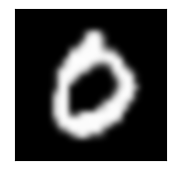

In [5]:
char = 0
X_test = X_test[np.where(y_test==char)]  
#[idx] = np.random.randint(0, X_test.shape[0], 1)
show_img(X_test[0])

###Show the pixel numebers of the image.

In [6]:
pd.DataFrame(X_test[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,11,150,253,202,31,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,37,251,251,253,107,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,21,197,251,251,253,107,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,110,190,251,251,251,253,169,109,62,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,253,251,251,251,251,253,251,251,220,51,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,182,255,253,253,253,253,234,222,253,253,253,0,0,0,0,0,0,0,0


In [7]:
X_test[0].shape

(28, 28)

###Convert the shape of an input data.

In [8]:
input_mat = X_test[0].reshape((1, 28, 28, 1))

`X_test[0].reshape((1, 28, 28, 1))`

The first 1 means a batch size. In an actual trainig process, this number will be such as 64, 128, 256 that represent the number of the training data set to input for one training.
Next, "28, 28" means the image size. Last "1" means the number of channel. If we deal with a color image, it is 3 because a color image has three channels for RGB.



### Change the range [0, 255] to [0, 1]
It is just to 

In [9]:
input_mat = np.round(input_mat/255.0, decimals=2) 

input_mat_disp = input_mat.reshape((input_mat.shape[1],input_mat.shape[2]))
pd.DataFrame(input_mat_disp)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.04,0.59,0.99,0.79,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.15,0.98,0.98,0.99,0.42,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.08,0.77,0.98,0.98,0.99,0.42,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.43,0.75,0.98,0.98,0.98,0.99,0.66,0.43,0.24,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.99,0.98,0.98,0.98,0.98,0.99,0.98,0.98,0.86,0.20,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.71,1.00,0.99,0.99,0.99,0.99,0.92,0.87,0.99,0.99,0.99,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0


In [ ]:
input_mat.shape

In [ ]:
model = Sequential()
model.add(Input(shape=(28,28,1)))                           

cnn_1 = Conv2D(1, kernel_size=3, strides=2, kernel_initializer=BottomEdge_filter, padding='same')
model.add(cnn_1)
model.build()

In [ ]:
out = model.predict(input_mat)
out = np.round(out.reshape((out.shape[1],out.shape[2])), decimals=2 )
show_img(out)
pd.DataFrame(out)

## Questions
---
<img src="https://drive.google.com/uc?id=1L8L4vIUsHhtZCZ5oB_rdLlLJGmXO58sm" width="800">

(1) Focusing on (10, 10), please confirm the convolution with a top edge filter. How did you calculate those values?

Answer:



---

<img src="https://drive.google.com/uc?id=1q2ejp_8huZ-3C6DSYPsXJ-K8xauO4s6O" width="700">

(2) Focusing on (10, 10), please confirm the convolution with a end edge filter. How did you calculate those values?

Answer:

(3) Focusing on (10, 10), please confirm the convolution with a left edge filter. How did you calculate those values?

Answer:

(4) Focusing on (10, 10), please confirm the convolution with a right edge filter. How did you calculate those values?

Answer:





---

<img src="https://drive.google.com/uc?id=1lgV8MS1Kyhy7HScrTEf1oGwINYT-OnAu" width="800">

(5) When you change the stride size from 1 to 2, what is the size of an output image after doing convolution? Please write the answer and the reason.

Answer:

(6) When you set the stride size to 2, which area on the convoluted image corresponds to the 3x3 area centered at (9, 9) on the input image? Please write the answer and the reason.

Answer:

Questions or Comments